The soliton's equation is $$\partial_t u + 6u\partial_x u + \partial_x^3 u = 0$$

La discretización está dada por:

$$\frac{u^{l+1}_{i}-u^l_i}{\Delta t} + 6u^{l}_i\frac{u^{l}_{i+1}-u^{l}_{i-1}}{2\Delta x}+ \frac{u^l_{i+2}-2u^l_{i+1}+2u^l_{i-1}-u^l_{i-2}}{2\Delta x^3} = 0$$

$$u^{l+1}_i = u^{l}_{i} - 6\left(\frac{\Delta t}{2\Delta x}\right)u^{l}_{i}\left( u^{l}_{i+1}-u_{i-1}^{l}\right) -\left(\frac{\Delta t}{2\Delta x^3}\right)\left( u_{i+2}^{l} - 2u_{i+1}^{l} + 2u_{i-1}^{l} - u_{i-2}^{l}\right) $$

In [344]:
%matplotlib notebook
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.animation as anim

In [365]:
def init_cond(x):
    return 1/(np.cosh(x)**2)

In [366]:
index = 1

def Init_matrix(t,x):
    Nx,Nt = len(x),len(t)
    T = np.zeros((Nt,Nx))
    T[0,:] = init_cond(x)
    return T

In [367]:
x = np.linspace(-1,1,15)
t = np.arange(0,1,1e-3)
dx = x[1]-x[0]
dt = t[1] - t[0]

u = Init_matrix(t,x)
u

array([[0.41997434, 0.51727704, 0.62379287, ..., 0.62379287, 0.51727704,
        0.41997434],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

$$u^{l+1}_i = u^{l}_{i} - 6\left(\frac{\Delta t}{2\Delta x}\right)u^{l}_{i}\left( u^{l}_{i+1}-u_{i-1}^{l}\right) -\left(\frac{\Delta t}{2\Delta x^3}\right)\left( u_{i+2}^{l} - 2u_{i+1}^{l} + 2u_{i-1}^{l} - u_{i-2}^{l}\right) $$

In [376]:
def Get_Solution(T,x,t,r):
    for l in tqdm(range(1,len(t))):
        dmax = 0.
        for i in range(len(x)):
            if 0 <= i <= 2:
                

In [377]:
dt/(dx**3)

0.34300000000000047

In [378]:
u = Init_matrix(t,x)
Get_Solution(u,x,t,0.2)

100%|█████████████████████████████████████████████████████████████████████████████| 999/999 [00:00<00:00, 20298.17it/s]


<IPython.core.display.Javascript object>


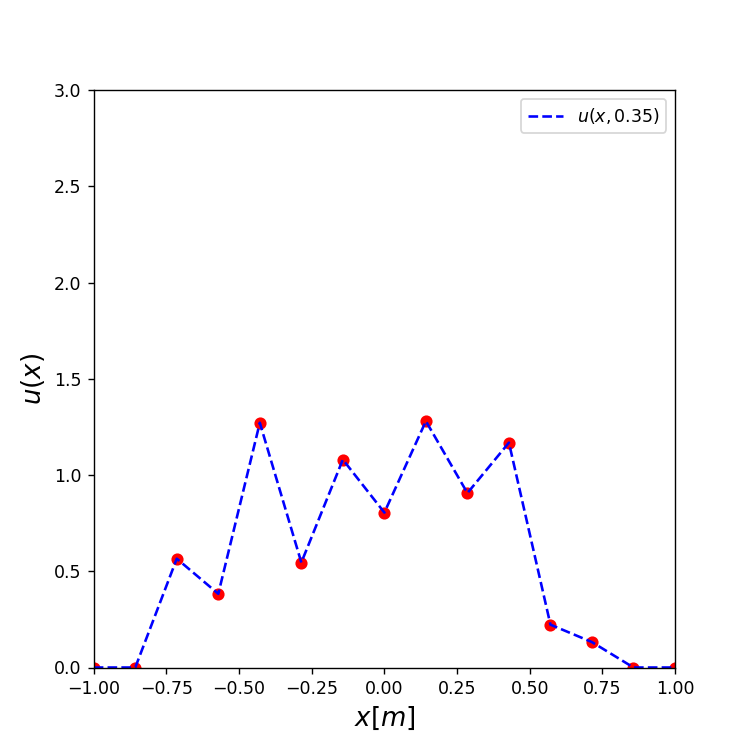

In [379]:
# Zona de animacion
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

def init():
    
    ax.set_xlim(x[0],x[-1])
    ax.set_ylim(0,3)
    ax.set_xlabel(r'$x[m]$', fontsize=15)
    ax.set_ylabel(r'$u(x)$', fontsize=15)    
    
def Update(i):
    plot = ax.clear()
    init()
    plot = ax.plot(x,u[i,:], '--' ,color='b', label=r'$u(x,%.2f)$' %(t[i]))
    plot = ax.scatter(x,u[i,:], marker='o', color='r')
    plot = plt.legend(loc=0)
    return plot

Animation = anim.FuncAnimation(fig, Update, frames=len(t), init_func=init)